# make plot CuT 1e-9 ENT=1e-8

In [1]:
% housekeeping
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-12);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cu_EN']; addpath(Cumodelspath);

In [2]:
% set constants

pHv=2:0.25:10.5; CuT=1e-6; ENT=0;

In [3]:
% make model with higher resolutions so plot line is smooth

% MODEL FOR COMPARISON
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

inorganicTOTALS=[CuT ENT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;

for i=1:length(pHv);
    pH=pHv(i); pe=20.75-pH; PCO2=10^-3.5;
    [Cuall(i),CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2open_EN_allsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
end


In [4]:
% experimental data

pH1=[10.387 8.653 6.481 4.493 2.162];
logCuA1=[-9.52703 -8.63176 -7.76689 -6.47297 -6];
logCuB1=[-11.5507 -10.0473 -7.97297 -6.35473 -6 ];
logCumodel1=[-14.5485	-9.54541	-6.04072	-6.00041	-6]

logCumodel1,1,2,3,4,5
1,-14.5485,-9.54541,-6.04072,-6.00041,-6


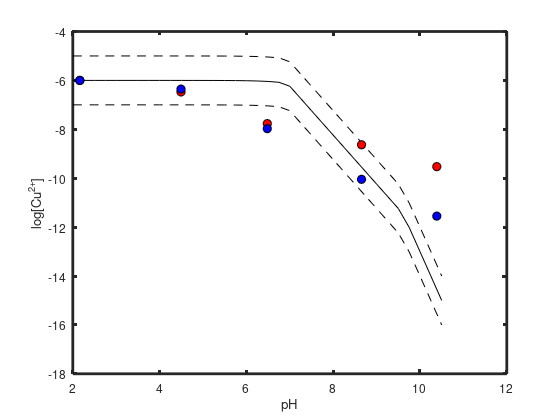

In [5]:
% make plot

plot(pHv,log10(Cuall),'k-', pHv,log10(Cuall*10),'k--', pHv,log10(Cuall./10),'k--')
hold on
plot(pH1,logCuA1,'ko','markerfacecolor','r')
plot(pH1,logCuB1,'ko','markerfacecolor','b')
xlabel('pH'); ylabel('log[Cu^{2+}]')
set(gca,'linewidth',2,'fontsize',12)

In [6]:
pH1
logCuA1
logCuB1

pHv'
log10(Cuall)

pH1,1,2,3,4,5
1,10.387,8.653,6.481,4.493,2.162


logCuA1,1,2,3,4,5
1,-9.52703,-8.63176,-7.76689,-6.47297,-6


logCuB1,1,2,3,4,5
1,-11.5507,-10.0473,-7.97297,-6.35473,-6


ans,1
1,2
2,2.25
3,2.5
4,2.75
5,3
6,3.25
7,3.5
8,3.75
9,4
10,4.25


ans,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
1,-6,-6,-6,-6.00001,-6.00001,-6.00002,-6.00004,-6.00007,-6.00013,-6.00023,-6.00042,-6.00074,-6.00131,-6.00234,-6.00416,-6.00742,-6.01325,-6.0237,-6.04258,-6.07679,-6.23941,-6.73941,-7.23941,-7.73941,-8.23941,-8.73941,-9.23941,-9.73941,-10.2394,-10.7394,-11.2394,-12.0101,-13.0032,-14.001,-15.0003
